In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')
from matplotlib.patches import Ellipse
#sns.set(color_codes=True)
%matplotlib inline

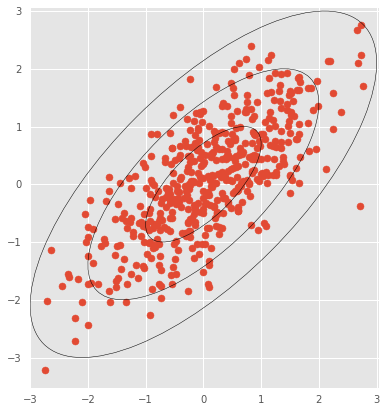

In [2]:
def plot_contours(cov, pos, n = 2, ax = None, **kwargs):
    if ax is None:
        ax = plt.subplot(111, aspect='equal')
    D, v = np.linalg.eig(cov)
    S = np.sqrt(D)
    
    for j in range(1, n+1):
        ell = Ellipse(xy=pos,
                  width=S[0]*j*2, height=S[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  color = 'black', **kwargs)
        ell.set_facecolor('none')
        ax.add_artist(ell)
        
Σ = [[1,0.7],
     [0.7,1]]
μ = [0,0]

X = np.random.multivariate_normal(μ, Σ, 500)
X.shape

plt.figure(figsize=(10,7))
plot_contours(Σ, μ, n = 3)
plt.scatter(X[:,0], X[:,1])         

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
def gaussian(x):
    Σ = [[1,x],
         [x,1]]
    μ = [0,0]
    X = np.random.multivariate_normal(μ, Σ, 100)
    
    plt.figure(figsize=(10,7))
    plot_contours(Σ, μ, n = 4)
    plt.scatter(X[:,0], X[:,1])
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()
    
interactive_plot = interactive(gaussian, x = (0,0.99))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot